<div class = "alert alert-block alert-info"><h5>Objective</h5></div>

<div class = "alert alert-block alert-warning">The BigMart have collected <strong>sales data for 1559 products across 10 stores</strong> in different cities. Also, certain attributes of each product and store have been defined. The aim is to <strong>build a predictive model</strong> and find out the sales of each product at a particular store.</div>

<div class = "alert alert-block alert-success">So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.</div>

---

<div class= "alert alert-block alert-info">Dataset Details</div>

![](https://i.imgur.com/WlgNuFs.png)

---

In [1]:
import pandas as pd
import seaborn as sn

In [2]:
df = pd.read_csv("sales_prediction.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
unique_val_f_col = pd.DataFrame({
    "column" : df.columns,
    "unique_values" : [df[col].unique() for col in df.columns],
    "unique_val_count" : [len(df[col].value_counts()) for col in df.columns]
})

In [6]:
pd.set_option("display.max_colwidth", None)

In [7]:
unique_val_f_col

,column,unique_values,unique_val_count
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO10, FDP10, FDH17, FDU28, FDY07, FDA03, FDX32, FDS46, FDF32, FDP49, NCB42, DRI11, FDU02, FDN22, FDW12, NCB30, FDC37, FDR28, NCD06, FDV10, DRJ59, FDE51, FDC14, FDV38, NCS17, FDP33, FDO23, DRH01, NCX29, FDV20, DRZ11, FDX10, FDB34, FDK43, FDA46, FDC02, FDL50, FDM39, NCP05, FDV49, FDL12, FDS02, NCL17, FDM40, FDR13, FDA43, NCP18, FDK21, NCX54, DRK35, FDY21, FDI26, FDM20, FDV27, FDF09, FDY40, FDY45, FDC46, FDH19, FDZ03, DRH37, NCI17, FDJ58, FDH35, FDG02, NCZ18, FDC29, FDQ10, FDN48, FDL04, FDV25, FDD58, FDN04, FDV45, NCL18, FDR12, FDG20, FDZ55, FDQ49, FDN33, FDN27, FDW20, DRG27, DRI25, FDA44, NCR17, FDU04, FDF41, FDB56, FDT28, FDD10, FDW57, DRB48, FDP09, ...]",1559
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, nan, 16.2, 11.8, 18.5, 15.1, 17.6, 16.35, 9.0, 13.35, 18.85, 14.6, 13.85, 13.0, 7.645, 11.65, 5.925, 19.25, 18.6, 18.7, 17.85, 10.0, 8.85, 9.8, 13.6, 21.35, 12.15, 6.42, 19.6, 15.85, 7.39, 10.195, 9.895, 10.895, 7.905, 9.195, 8.365, 7.97, 17.7, 19.35, 8.645, 15.6, 18.25, 7.855, 7.825, 8.39, 12.85, 19.0, 5.905, 7.76, 16.75, 15.5, 6.055, 6.305, 20.85, 20.75, 8.895, 19.7, 8.75, 13.3, 8.31, 19.75, 17.1, 10.5, 6.635, 14.15, 8.89, 9.1, 7.5, 16.85, 7.485, 11.6, 12.65, 20.25, 8.6, 12.6, 8.88, 20.5, 13.5, 7.235, 6.92, 8.02, 12.8, 16.6, 14.0, 16.0, 21.25, 7.365, 18.35, 5.465, 7.27, 6.155, 19.5, 15.2, ...]",415
2,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0.012741089, 0.127469857, 0.016687114, 0.09444959, 0.045463773, 0.1000135, 0.047257328, 0.0680243, 0.069088961, 0.008596051, 0.069196376, 0.034237682, 0.10249212, 0.138190277, 0.035399923, 0.025698134, 0.057556998, 0.025896485, 0.099887103, 0.066693437, 0.019356132, 0.161466534, 0.072221801, 0.170348551, 0.080829372, 0.097904029, 0.089291137, 0.059511812, 0.113123893, 0.123111453, 0.026480954, 0.102511504, 0.02681843, 0.117818348, 0.069102831, 0.042277867, 0.089498926, 0.025879577, 0.121632721, 0.255394896, 0.067779712, 0.159803853, 0.028696932, 0.065041581, 0.028760013, 0.010053105, 0.048157338, 0.071958197, 0.173481304, 0.061082177, 0.040071131, 0.012090074, 0.15028599, 0.026015519, 0.195068226, 0.033082215, 0.078946455, 0.041700756, 0.143422643, 0.105296072, 0.121531501, 0.011324862, 0.186357148, 0.024205661, 0.033230816, 0.113720344, 0.112556507, 0.059352241, 0.014087057, 0.045230944, 0.293417759, 0.031382044, 0.12639886, 0.025403898, 0.039057677, 0.123115764, 0.039624006, 0.040421193, 0.105274111, 0.033970195, 0.053212652, 0.024378706, 0.009714595, 0.131383762, 0.07461309, 0.028459761, 0.074627201, 0.063695084, 0.045797829, 0.115857223, 0.024832806, 0.034027909, 0.0467696, 0.116576702, 0.278974075, 0.035913805, ...]",7880
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetables, Household, Baking Goods, Snack Foods, Frozen Foods, Breakfast, Health and Hygiene, Hard Drinks, Canned, Breads, Starchy Foods, Others, Seafood]",16
5,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614, 51.4008, 57.6588, 107.7622, 96.9726, 187.8214, 45.5402, 144.1102, 145.4786, 119.6782, 196.4426, 56.3614, 115.3492, 54.3614, 113.2834, 230.5352, 250.8724, 144.5444, 196.5084, 107.6938, 165.021, 45.906, 42.3112, 39.1164, 45.5086, 43.6454, 55.7956, 96.4436, 256.6672, 93.1436, 174.8738, 146.7102, 128.0678, 122.5388, 36.9874, 87.6198, 230.6352, 126.002, 192.9136, 259.9278, 126.5046, 178.1002, 153.3024, 265.2226, 60.622, 196.8794, 143.8812, 141.5154, 117.0492, 196.3794, 151.4708, 249.0408, 106.1622, 38.0506, 194.511, 180.0344, 246.9144, 87.3514, 38.2848, 51.0692, 255.8356, 185.4266, 172.5738, 186.024, 164.8526, 95.841, 170.1764, 59.222, 164.7526, 189.6188, 254.3698, 114.0176, 172.3422, 89.9804, 104.9622, 222.5456, 101.87, 180.3344, 187.9556, 194.6136, 171.3764, 177.0028, 160.992, 155.963, 95.6436, 117.2808, 122.173, 39.9138, 55.1614, 57.893, 114.5492, 120.0414, 246.046, 187.4556, 149.9708, 187.8556, ...]",5938
6,O

In [8]:
def standardize_item_fat_content(dataframe):
    dataframe["Item_Fat_Content"] = dataframe["Item_Fat_Content"].replace({"Low Fat": "Low Fat", "low fat": "Low Fat", "LF": "Low Fat", "Regular": "Regular", "reg": "Regular"})
    return dataframe

In [9]:
df = standardize_item_fat_content(df)

<div class = "alert alert-block alert-info">Now, we are going to preparing training and testing dataset.</div>

<div class = "alert alert-block alert-info">70% - Train Data <br> 30% - Test Data <br>Random seed = 42</div>

In [10]:
x = df.iloc[:,:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [11]:
y = df.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(f"x_train shape:\t{x_train_org.shape}\tx_test shape:\t{x_test_org.shape}\ny_train shape:\t{y_train_org.shape}\t\ty_test shape:\t{y_test_org.shape}\n")

x_train shape:	(5966, 11)	x_test shape:	(2557, 11)
y_train shape:	(5966,)		y_test shape:	(2557,)



In [13]:
x_train = x_train_org.copy()

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [15]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<div class = "alert alert-block alert-warning"> As we have null values in 2 columns; "Item_Weight" and "Outlet_Size"</div>

In [16]:
num_x_train = x_train.select_dtypes(exclude= ["object"])
num_x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.720,0.147904,116.6466,1998
655,19.750,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.350,0.118342,222.6088,2002
3528,18.350,0.092150,184.8266,1987
...,...,...,...,...
5734,9.395,0.286345,139.1838,1998
5191,15.600,0.117575,75.6670,2007
5390,17.600,0.018944,237.3590,2002
860,20.350,0.054363,117.9466,2007


In [17]:
num_x_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
def visualise_num_col(data_frame, col_name):
    fig, ax = plt.subplots(1,2, figsize = (12,5))
    sn.histplot(data=data_frame, x=col_name, ax=ax[0])
    sn.boxplot(data=data_frame, y=col_name, ax=ax[1])

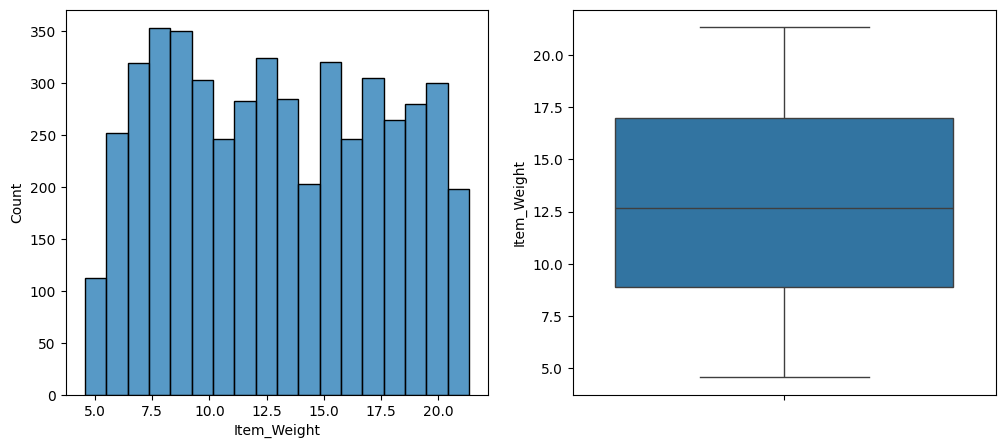

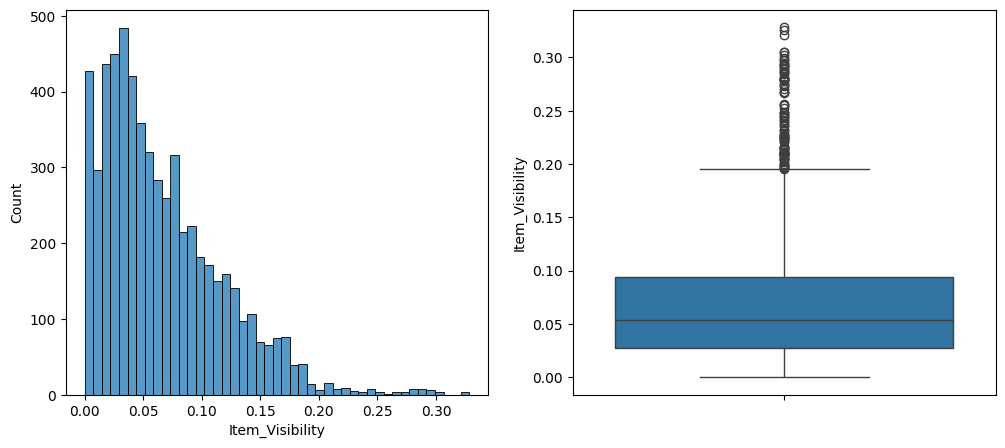

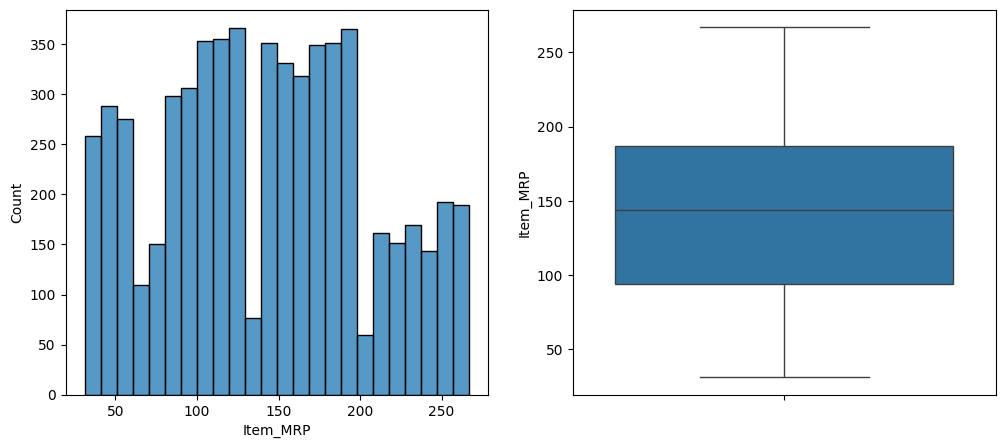

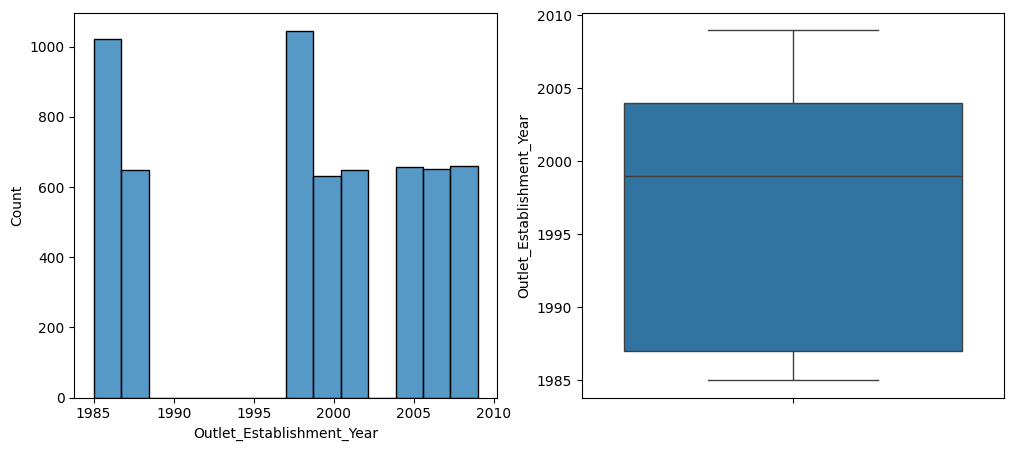

In [20]:
for i in range(0, len(num_x_train.columns)):
    visualise_num_col(num_x_train, num_x_train.columns[i])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

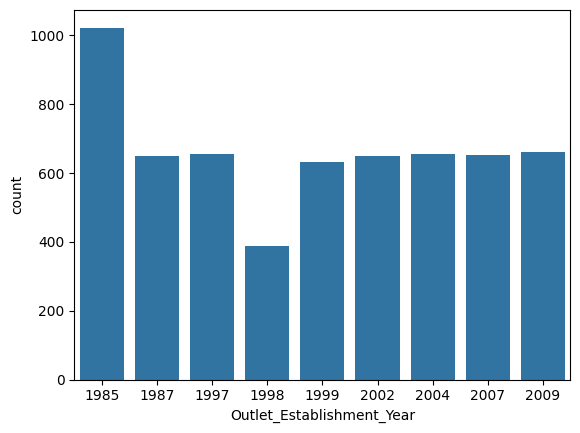

In [21]:
sn.countplot(data=num_x_train, x = "Outlet_Establishment_Year")

In [22]:
cat_x_train = x_train.select_dtypes(include=["object"])
cat_x_train

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
5734,FDY08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,FDC41,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,NCQ53,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,FDL46,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [23]:
cat_x_train.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,2,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3860,905,668,1960,2367,3893


In [24]:
for i in range(0, len(cat_x_train.columns)):
    print(cat_x_train[cat_x_train.columns[i]].value_counts(), "\n\n")

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64 


Item_Fat_Content
Low Fat    3860
Regular    2106
Name: count, dtype: int64 


Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64 


Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64 


Outlet_Size
Medium    1960
Small     1667
High      

<div class = "alert alert-block alert-info">Data Wrangling + Feature Engineering</div>

In [25]:
x_train["Item_Identifier"].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [26]:
def create_item_type(dataframe):
    x_train["Item_Type"] = x_train["Item_Identifier"].str[:2]
    x_train["Item_Type"] = x_train["Item_Type"].map({"FD": "Food", "NC": "Non_Consumable", "DR": "Drink"})
    return dataframe

In [27]:
x_train = create_item_type(x_train)
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non_Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non_Consumable,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,Low Fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [28]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
x_train[["Item_Identifier", "Item_Weight"]].sort_values(by = ["Item_Identifier"])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
1693,DRA12,11.60
8043,DRA12,11.60
7467,DRA12,11.60
1148,DRA24,19.35
...,...,...
4924,NCZ53,9.60
7926,NCZ54,14.65
2839,NCZ54,14.65
1896,NCZ54,NaN


In [30]:
x_train[["Item_Identifier", "Item_Weight"]].drop_duplicates().sort_values(by = ["Item_Identifier"])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [31]:
item_id_weight_pivot = x_train.pivot_table(index= "Item_Identifier", values= "Item_Weight").reset_index()
item_id_weight_pivot

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [32]:
item_id_weight_mapping = dict(zip(item_id_weight_pivot["Item_Identifier"], item_id_weight_pivot["Item_Weight"]))

In [33]:
list(item_id_weight_mapping.items())

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85),
 ('DRC13', 8.26),
 ('DRC25', 5.73),
 ('DRC27', 13.800000000000002),
 ('DRC36', 13.0),
 ('DRC49', 8.67),
 ('DRD01', 12.1),
 ('DRD12', 6.959999999999999),
 ('DRD13', 15.0),
 ('DRD15', 10.6),
 ('DRD24', 13.85),
 ('DRD25', 6.135),
 ('DRD27', 18.75),
 ('DRD37', 9.8),
 ('DRD49', 9.895),
 ('DRD60', 15.7),
 ('DRE01', 10.1),
 ('DRE03', 19.6),
 ('DRE12', 4.59),
 ('DRE13', 6.28),
 ('DRE15', 13.35),
 ('DRE25', 15.35),
 ('DRE27', 11.85),
 ('DRE37', 13.5),
 ('DRE48', 8.43),
 ('DRE49', 20.75),
 ('DRE60', 9.395),
 ('DRF01', 5.655),
 ('DRF03', 19.1),
 ('DRF13', 12.1),
 ('DRF15', 18.35),
 ('DRF23', 4.61),
 ('DRF25', 9.0),
 ('DRF27', 8.93),
 ('DRF36', 16.1),
 ('DRF37', 17.25),
 ('DRF48', 5.73),
 ('DRF49', 7.27),
 ('DRF51', 15.75),
 ('DRF60', 10.8),
 ('DRG01', 14.8),
 ('DRG03', 14.5),
 ('DRG11', 6.385),
 ('DRG

In [34]:
item_type_weight_pivot = x_train.pivot_table(index= "Item_Type", values= "Item_Weight", aggfunc="median").reset_index()
item_type_weight_pivot

,Item_Type,Item_Weight
0,Drink,11.80
1,Food,12.80
2,Non_Consumable,13.05


In [35]:
item_type_weight_mapping = dict(zip(item_type_weight_pivot["Item_Type"], item_type_weight_pivot["Item_Weight"]))
list(item_type_weight_mapping.items())

[('Drink', 11.8), ('Food', 12.8), ('Non_Consumable', 13.05)]

In [36]:
def impute_item_weight(data_frame):
    data_frame.loc[:, "Item_Weight"] = data_frame.loc[:, "Item_Weight"].fillna(data_frame.loc[:, "Item_Identifier"].map(item_id_weight_mapping))
    data_frame.loc[:, "Item_Weight"] = data_frame.loc[:,"Item_Weight"].fillna(data_frame.loc[:,"Item_Type"].map(item_type_weight_mapping))
    return data_frame

In [37]:
x_train = impute_item_weight(x_train)

In [38]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [39]:
x_train.groupby(["Outlet_Type","Outlet_Size"])["Outlet_Size"].count()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
Name: Outlet_Size, dtype: int64

In [40]:
from scipy.stats import mode

In [41]:
oulet_type_size_pivot = x_train.pivot_table(index="Outlet_Type", values="Outlet_Size", aggfunc=(lambda x: x.mode()[0])).reset_index()
oulet_type_size_mapping = dict(zip(oulet_type_size_pivot["Outlet_Type"], oulet_type_size_pivot["Outlet_Size"]))
list(oulet_type_size_mapping.items())

[('Grocery Store', 'Small'),
 ('Supermarket Type1', 'Small'),
 ('Supermarket Type2', 'Medium'),
 ('Supermarket Type3', 'Medium')]

In [42]:
def impute_oulet_size(dataframe):
    dataframe.loc[:, "Outlet_Size"] = dataframe.loc[:, "Outlet_Size"].fillna(dataframe.loc[:, "Outlet_Type"].map(oulet_type_size_mapping))
    return dataframe

In [43]:
x_train = impute_oulet_size(x_train)

In [44]:
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [45]:
x_train["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    3860
Regular    2106
Name: count, dtype: int64

In [46]:
x_train.groupby(["Item_Type","Item_Fat_Content"])["Item_Fat_Content"].count()

Item_Type       Item_Fat_Content
Drink           Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non_Consumable  Low Fat             1137
Name: Item_Fat_Content, dtype: int64

In [47]:
def correct_item_fat_content(dataframe):
    dataframe.loc[dataframe["Item_Type"] == "Non_Consumable", "Item_Fat_Content"] = "Non_Edible"
    return dataframe

In [48]:
x_train = correct_item_fat_content(x_train)

In [49]:
x_train.groupby(["Item_Type", "Item_Fat_Content"])["Item_Fat_Content"].count()

Item_Type       Item_Fat_Content
Drink           Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non_Consumable  Non_Edible          1137
Name: Item_Fat_Content, dtype: int64

In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [51]:
def prepare_dataset(dataframe):
    dataframe = create_item_type(dataframe)
    dataframe = impute_item_weight(dataframe)
    dataframe = impute_oulet_size(dataframe)
    dataframe = standardize_item_fat_content(dataframe)
    dataframe = correct_item_fat_content(dataframe)
    return dataframe

In [52]:
x_train_org = prepare_dataset(x_train_org)
x_test_org = prepare_dataset(x_test_org)

In [53]:
cat_x_train = x_train.select_dtypes(include=["object"])
cat_x_train

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
5734,FDY08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
5191,FDC41,Low Fat,Food,OUT017,Small,Tier 2,Supermarket Type1
5390,NCQ53,Non_Edible,Non_Consumable,OUT045,Small,Tier 2,Supermarket Type1
860,FDL46,Low Fat,Food,OUT017,Small,Tier 2,Supermarket Type1


In [54]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(cat_x_train)

OneHotEncoder(handle_unknown='ignore')

In [55]:
ohe_features = ohe.get_feature_names_out(input_features= cat_x_train.columns)
ohe_features

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [56]:
num_x_train = x_train.select_dtypes(exclude=["object"]).reset_index(drop = True)
num_x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.720,0.147904,116.6466,1998
1,19.750,0.014301,103.0332,1997
2,8.600,0.054221,129.1310,1985
3,19.350,0.118342,222.6088,2002
4,18.350,0.092150,184.8266,1987
...,...,...,...,...
5961,9.395,0.286345,139.1838,1998
5962,15.600,0.117575,75.6670,2007
5963,17.600,0.018944,237.3590,2002
5964,20.350,0.054363,117.9466,2007


In [57]:
cat_x_train_ohe = pd.DataFrame(ohe.transform(cat_x_train).toarray(), columns = ohe_features)

In [58]:
cat_x_train_ohe

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
x_train_final = pd.concat([num_x_train, cat_x_train_ohe], axis = 1)
x_train_final

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.720,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.750,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.600,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.350,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.350,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,9.395,0.286345,139.1838,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5962,15.600,0.117575,75.6670,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5963,17.600,0.018944,237.3590,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5964,20.350,0.054363,117.9466,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
num_x_test = x_test_org.select_dtypes(exclude=["object"]).reset_index(drop = True)
cat_x_test = x_test_org.select_dtypes(include=["object"])
cat_x_test_ohe = pd.DataFrame(ohe.transform(cat_x_test).toarray(), columns = ohe_features)
x_test_final = pd.concat([num_x_test, cat_x_test_ohe], axis = 1)
x_test_final

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,12.350,0.164197,120.5124,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2553,5.460,0.032171,184.8240,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2554,18.350,0.148939,191.9504,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2555,10.000,0.037978,128.6994,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [62]:
def train_and_eval_model(model, x_train, y_train, cv= 5):
    cv_result = cross_validate(model, x_train, y_train, cv =cv, scoring =('r2', 'neg_root_mean_squared_error'))
    print("Model\t:", model)
    
    r2_scores = cv_result["test_r2"]
    print("R2 cv score:\t", r2_scores)
    
    rmse_scores = cv_result["test_neg_root_mean_squared_error"]
    rmse_scores = [-1*score for score in rmse_scores]
    print("RMSE cv score:\t", rmse_scores)

In [63]:
rf = RandomForestRegressor(random_state = 42)
train_and_eval_model(model = rf, x_train=x_train_final, y_train=y_train_org)

Model	: RandomForestRegressor(random_state=42)
R2 cv score:	 [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
RMSE cv score:	 [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]


In [64]:
gb = GradientBoostingRegressor(random_state=42)
train_and_eval_model(model = gb, x_train=x_train_final, y_train=y_train_org)

Model	: GradientBoostingRegressor(random_state=42)
R2 cv score:	 [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
RMSE cv score:	 [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]


In [65]:
xgr = xgb.XGBRegressor(objective="reg:squarederror", random_state = 42)
train_and_eval_model(model = xgr, x_train=x_train_final, y_train=y_train_org)

Model	: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 cv score:	 [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
RMSE cv score:	 [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.8930768039459]


In [66]:
lgbmr = LGBMRegressor(random_state=42)
train_and_eval_model(model = lgbmr, x_train=x_train_final, y_train=y_train_org)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [67]:
gb.fit(x_train_final, y_train_org)

GradientBoostingRegressor(random_state=42)

In [72]:
y_pred = gb.predict(x_test_final)

In [73]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [74]:
print("R2 score:\t", r2_score(y_test_org, y_pred))

R2 score:	 0.5932386120045416


In [77]:
print("RMSE score:\t", root_mean_squared_error(y_test_org, y_pred))

RMSE score:	 1067.3968404280724
